# IDENTIFICACIÓN DE SISTEMAS

Profesor: Jairo Alberto Cuéllar Guarnizo  
Programa: Ingeniería en Automatización y Control

In [1]:
from sympy import MatrixSymbol, Matrix, Identity

import sympy as sym
import pandas as pd
import math

sym.init_printing()
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import control
import random

# Modelamiento de Sistemas Dinámicos

El modelamiento de los sistemas dinámicos permite describir matemáticamente el comportamiento de un sistema. Arroja una herramienta matemática susceptible de análisis que puede incluir simulaciones, ajustes, etc. El modelamiento del sistema puede ser en tiempo discreto o continuo. 

### Modelamiento en tiempo continuo:

Considerando que todos los fenómenos físicos ocurren de forma natural en tiempo continuo, se define la siguiente ecuación diferencial para el modelo del sistema dinámico así:

$$\dot{x(t)} = f(x(t), u(t), \epsilon(t), p)$$

Es claro que todos estos elementos de esta función son claramente vectores y se definen así:

* Estados x(t): describen el comportamiento interno del sistema, todas las variables de estado ajustadas conforman el vector de estados x(t).
* Entradas de control u(t): Estas señales con exógenas al sistema y normalmente se originan en un sistema de control digital y permite modificar el comportamiento interno del sistema.
* Perturbaciones $\epsilon(t)$: señales aleatorias que normalmente representan errores en el modelamiento de la planta.
* p: vector de parámetros constantes y que deben ser identificados en el procedimiento de identificación.

En adelante se utilizará el punto "$\dot{}$" con el fin de señalar la derivada en el tiempo de cualquier cantidad, así la variable depende total o parcialmente del tiempo. 

$$\dot{x} = \frac{dx}{dt} = \frac{\partial x}{\partial t}$$

Por simplicidad se omitirá la dependencia de las variables del -tiempo, así:

$$\dot{x} = f(x, u, \epsilon, p)$$

### Modelamiento: 

Es el proceso de la obtención de la función "f", para crear o encontrar la ecuación diferencial ordinaria (EDO) que describe el sistema lo mejor posible.

### Identificación: 

Es el proceso de estimar los valores de los parámetros "p", contenidos en f. Este proceso se realiza a partir de DATOS EXPERIMENTALES apropiadamente recolectados.

El objetivo de estos 2 procesos es obtener un modelo con parámetros validados que permita hacer predicciones sobre el comportamiento futuro del sistema. En palabras simples, el vector de estado contiene toda la información actual del sistema y en el pasado (memoria del sistema) y permitirá predecir el comportamiento futuro del mismo.


## Sistemas Lineales e Invariantes en el Tiempo (LTI Systems)

En el modelamiento matemático previo a la implementación de un sistema de control. Los sistemas LTI cobran importancia, toda vez que son una herramienta poderosa tanto para el modelamiento del sistema, la identificación y el control del proceso por realimentación de estados.

$$\dot{x} = A.x + B.u$$

Es importante señalar que para el proceso de identificación, se hace necesario contar con la o las salidas del sistema dadas por la relación:

$$y = C.x + D.u$$

Donde la salida "y", usualmente suele ser la única cantidad medible y los estados. Es necesario recordar que el estado inicial y la respuesta natural del sistema aparece en cuando no existe señal de exitación u(t):

$$\dot{x} = A.x$$

Cuya solución trivial es la siguiente:

$$x(t) = x_0.e^{A.t}$$

## Muestreo de señales

Recordar que existe el teorema de muestreo y en el siguiente notebook, encontrarán información al respecto:

[Señales Discreto](https://github.com/pierrediazp/Se-ales_y_Sistemas/blob/cd19bef5c2f0a616ed6ea47b6ec742fe6901eb77//09_muestreo.ipynb)

En el caso de este curso, el modelo del sistema, las señales involucradas y demás hasta el momento se han trabajado de forma continua (a pesar que el tiempo es un vector y las señales también).

## Retenedor de orden cero (ZOH)

El retenedor de orden cero (ZOH), es una de las estrategias para transformar un sistema dinámico que aparece en tiempo continuo a uno en tiempo discreto. Se entiende que el sistema de tiempo continuo (planta), tiene un retenedor de orden cero en la entrada. Por tanto la función de transferencia de tiempo discreto tendría la siguiente forma:

![ZOH](figuras/zoh.png)

A menudo la señal de control u(t) es generada por una computadora como un valor constante entre 2 instantes de tiempo $\Delta t$, así que los instantes de muestreo estarán dados por $t_k = k\Delta t$. Por tanto se puede definir que a partir de un sistema en tiempo continuo dado por:

$$\dot{x} = f(x(t),u_{cte}) $$

Se define entonces una función discreta de la siguiente manera:

$$x[t_k+1] = f_{dis}(x[t_k],u_k)$$

Retomando la representación en tiempo continuo para el sistema en espacio de estados se tiene que:

$$\dot{x} = A.x + B.u$$

Resolviendo dicha ecuación y teniendo en cuenta el $x_{init}, t_{init}, u_k$ se tiene que:

$$x_{k+1} = A_{dis}x_k+B_{dis}u_k$$

Donde:

$$A_{dis} = e^{A\Delta t}$$

$$B_{dis} = \int_{0}^{\Delta t}e^{A(\Delta t - \tau)}Bd\tau = e^{A\Delta t}\int_{0}^{\Delta t}e^{-A\tau}.Bd\tau$$

$$B_{dis} = A^{-1}(e^{A\Delta t} - I)B$$

Considerando la ecuación de salida del sistema, se concluye que en el tiempo continuo y discreto la matriz de estado y de entrada son distintas. Sin embargo, la matriz de salida puede permanecer igual, así como la de transmisión directa. El sistema en tiempo discreto es igualmente LTI.

## Discretización de Sistemas y Señales

Existen otros métodos de discretización como lo son la equivalencia de polos entre S y z, bajo la premisa que $z = e^{ST}$ siendo T el periodo de muestreo. 

Existe el método de aproximación de Transformación Lineal, sujeta a la siguiente relación:

$$S = \frac{2(z-1)}{T(z+1)}$$


**Ejemplo:** Obtener un modelo discreto para el sistema dado por la siguiente EDO, asuma $\Delta t = 0.8s$:

$$\dot{x} = -3x + 5$$

Paso 1: $A_{dis} = e^{-3 (0.8)}$

Paso 2: $B_{dis} = -\frac{1}{3}(e^{-3 (0.8)}-1)*5$

In [2]:
dt = random.random()            # Tiempo de muestreo

A = Matrix([-3])
B = Matrix([5])
u = 1

Adis = (dt*A).exp();
Bdis = A.inv()*(Adis-np.eye(len(B)))*B
Adis, Bdis, dt

([0.212501531887882], [1.31249744685353], 0.516268693919832)

## Comparación SS en Td vs Tc

![RLC - Serie](figuras/RLC.jpg)

* Ecuaciones Diferenciales  
\begin{equation}
\frac{di}{dt} = -\frac{R}{L}i-\frac{v_{c}}{L}+\frac{v}{L}
\end{equation}  

\begin{equation}
\frac{dv_{c}}{dt} = -\frac{i}{C}
\end{equation}  

* Función de Transferencia  

\begin{equation}
G(S) = \frac{v_{c}(S)}{v(S)} = \frac{\frac{1}{LC}}{S^{2}+\frac{R}{L}S+\frac{1}{LC}}
\end{equation}  

* Espacio de estados  

$$A = \left [ \matrix{ -\frac{R}{L} & -\frac{1}{L} \\ \frac{1}{C} & 0 } \right ], \; 
B = \left [ \matrix{\frac{1}{L} \\ 0 } \right ], \;
C = \left [ \matrix{0 & 1} \right ], \;
D = 0$$  

Asumiendo parámetros con valores R , C , L 

In [10]:
###   Definir un espacio de estados en el tiempo:
###   Circuito RLC - Serie
dt = random.random()            # Tiempo de muestreo

R = 2;
Co = 1;
L = 2;


A = Matrix([[-R/L,-1/L],[1/Co,0]])
B = Matrix([[1/L],[0]])
C = Matrix([[0,1]])
D = 0

A, B, C, D, dt

⎛⎡-1.0  -0.5⎤  ⎡0.5⎤                              ⎞
⎜⎢          ⎥, ⎢   ⎥, [0  1], 0, 0.974969197070378⎟
⎝⎣1.0    0  ⎦  ⎣ 0 ⎦                              ⎠

In [11]:
## VERIFICAR LAS ECUACIONES PARA A Y B EN TD
Adis = (dt*A).exp()
Bdis = A.inv()*(Adis-np.eye(len(B)))*B

Adis, Bdis

⎛⎡0.254947156422871  -0.287679975360956⎤  ⎡0.287679975360956⎤⎞
⎜⎢                                     ⎥, ⎢                 ⎥⎟
⎝⎣0.575359950721913  0.830307107144784 ⎦  ⎣0.169692892855216⎦⎠

In [16]:
## CALCULANDO LA MATRIZ DISCRETA POR SERIE DE TAYLOR
A = dt*A
# Numero de aproximación serie de taylor
k = 10
Ad1 = np.eye(len(B));
for i in range(k):
    Ad1 = Ad1 + np.linalg.matrix_power(A,(i+1))/(np.math.factorial(i+1))
Ad1

array([[0.268313544612854, -0.284487779825009],
       [0.568975559650018, 0.837289104262872]], dtype=object)

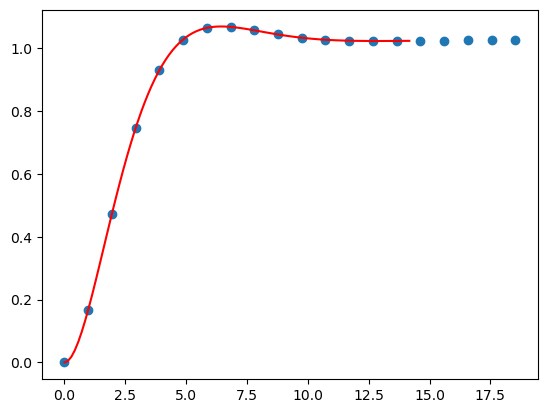

In [13]:
### Método c2d continuo a discreto
Gs = control.ss(A,B,C,D)
Gd2 = control.c2d(Gs,dt,'zoh')

t1,y1 = control.step_response(Gs)
plt.plot(t1,y1,color = 'red')
t2,y2 = control.step_response(Gd2)
plt.scatter(t2,y2)

In [14]:
# Obtenido a partir del modelo original en tiempo continuo
Gd2

StateSpace(array([[ 0.26831354, -0.28448778],
       [ 0.56897556,  0.8372891 ]]), array([[0.29179156],
       [0.16688824]]), array([[0., 1.]]), array([[0.]]), 0.974969197070378)

In [15]:
#Aplicando las ecuaciones de discretización vistas
Adis, Bdis, C, D

⎛⎡0.254947156422871  -0.287679975360956⎤  ⎡0.287679975360956⎤           ⎞
⎜⎢                                     ⎥, ⎢                 ⎥, [0  1], 0⎟
⎝⎣0.575359950721913  0.830307107144784 ⎦  ⎣0.169692892855216⎦           ⎠